# MLT COMP3222 Coursework

## Project Setup
The following section sets up the needed component of the project.
The first cell imports the needed libraries for the rest of the project.
The second cell imports the txt files and converts them into panda dataframes.
The remaining cells are use check that the import is successful.

In [305]:
# Import Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Libraries for text processing
import re
import nltk
nltk.download('stopwords')

# Importing Libraries for translation
from langdetect import detect
from googletrans import Translator

# Importing Libraries for data selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Importing libraries for model building
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer









[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [306]:
# Importing the training dataset
training_data = pd.read_table("DataSet\mediaeval-2015-trainingset.txt", sep="\t",lineterminator='\n', skiprows=(0),  header=0)
# Importing the testing dataset
testing_data = pd.read_table("DataSet\mediaeval-2015-testset.txt", sep="\t",lineterminator='\n', skiprows=(0),  header=0)


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\jimmy\AppData\Local\Temp\ipykernel_20632\1488028633.py:2: SyntaxWarning: invalid escape sequence '\m'
  training_data = pd.read_table("DataSet\mediaeval-2015-trainingset.txt", sep="\t",lineterminator='\n', skiprows=(0),  header=0)
C:\Users\jimmy\AppData\Local\Temp\ipykernel_20632\1488028633.py:4: SyntaxWarning: invalid escape sequence '\m'
  testing_data = pd.read_table("DataSet\mediaeval-2015-testset.txt", sep="\t",lineterminator='\n', skiprows=(0),  header=0)


In [307]:
# Checking the training data has been imported correctly
training_data.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


In [308]:
# Checking the testing data has been imported correctly
testing_data.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... htt...,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse fr...,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C...,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake


## Data Analysis
The following segment composes the data analysis of the project. Initally broad, general data analysis is conducted. After this the individual columns are investigated if they are deenmed to possibly have useful infomation.

In [309]:
# Getting basic infomation about the training data
training_data.info()
# 14277 rows and 7 columns: tweet_id, user_id, tweet_text, image_id, image_url, timestamp, label
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [310]:
# Getting basic infomation about the testing data
testing_data.info()
# 3559 rows and 7 columns: tweet_id, user_id, tweet_text, image_id, image_url, timestamp,label
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     3755 non-null   int64 
 1   tweetText   3755 non-null   object
 2   userId      3755 non-null   int64 
 3   imageId(s)  3755 non-null   object
 4   username    3755 non-null   object
 5   timestamp   3755 non-null   object
 6   label       3755 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.5+ KB


In [311]:
# Counting the number of different labels in the training data
training_counts = training_data['label'].value_counts()
training_counts

label
fake     6742
real     4921
humor    2614
Name: count, dtype: int64

In [312]:
# Counting the number of different labels in the testing data
testing_counts = testing_data['label'].value_counts()
testing_counts

label
fake    2546
real    1209
Name: count, dtype: int64

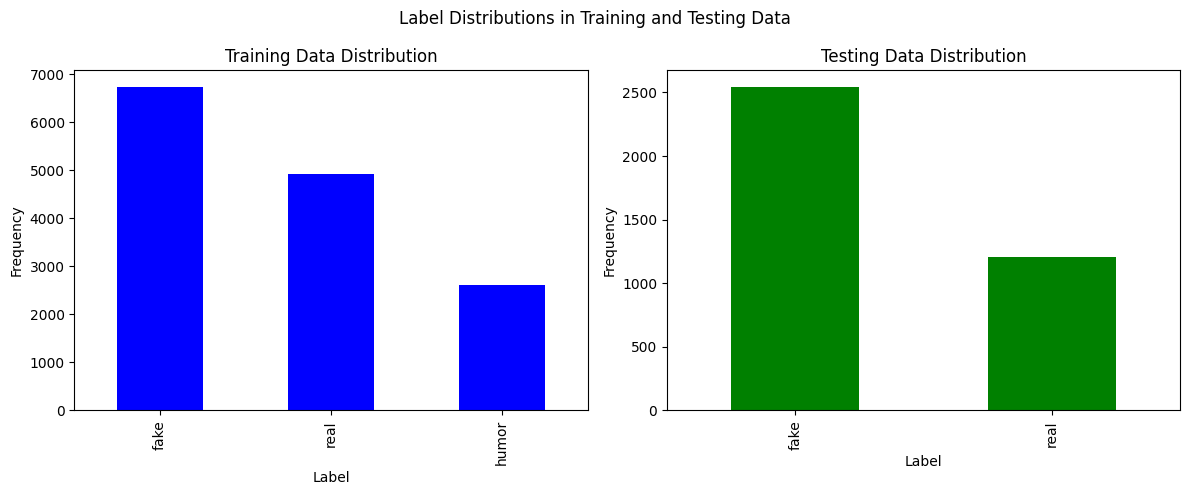

In [313]:
# The following code is used to plot the distribution of the labels in the training and testing data (the number of tweets for fake, real and humor)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Training Data Label Distribution
training_data['label'].value_counts().plot(kind='bar', ax=axes[0], title='Training Data Distribution', color='blue')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Frequency')

# Plot Testing Data Label Distribution
testing_data['label'].value_counts().plot(kind='bar', ax=axes[1], title='Testing Data Distribution', color='green')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Frequency')

# Add a title to the figure
plt.suptitle('Label Distributions in Training and Testing Data')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [314]:
# The following code creates a new_label column in the training and testing data frame
# This column shows the wanted output labels of the project with fake and humour tweets being 1 and real tweets being 0
# NOTE: This does not change the original label column and all the original data is still intact. This is only done to see the distribution of the wanted output labels 
training_data['new_label'] = training_data['label'].apply(lambda x: 1 if x in ['fake', 'humor'] else 0)
testing_data['new_label'] = testing_data['label'].apply(lambda x: 1 if x in ['fake', 'humor'] else 0)


In [315]:
# Counting the number of different new_labels in the training data
# This shows the distribution of the wanted output labels (this is not done for the testing data as the label values are not different)
training_counts = training_data['new_label'].value_counts()
training_counts

new_label
1    9356
0    4921
Name: count, dtype: int64

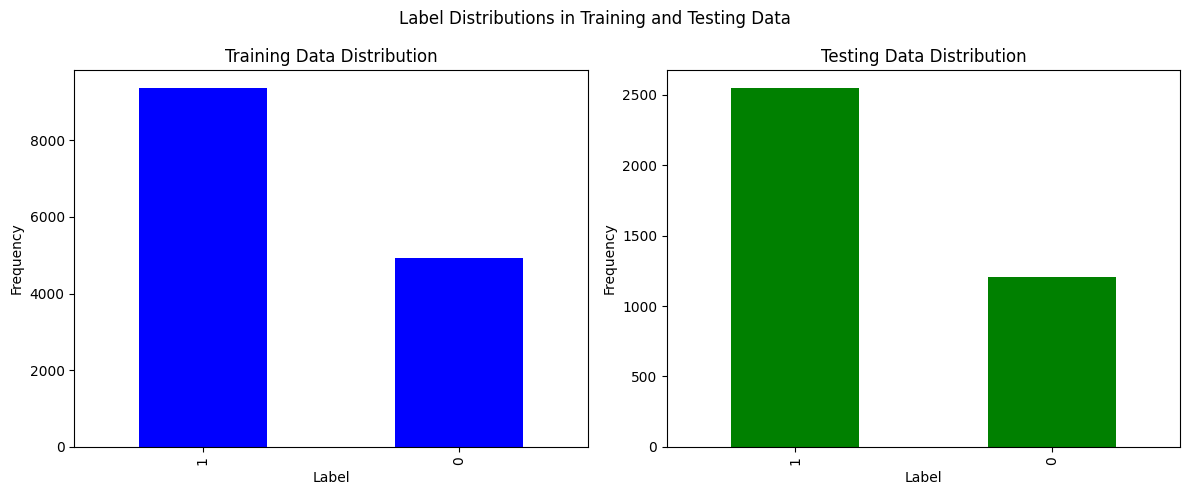

In [316]:
# Similar to the above plotting code the following code plots the new_label distribution in the training and testing data.
# This is done to see the distribution of the wanted output labels
# NOTE: The second graph is the same as the previous graph collection just with different labels since the testing set only has 2 labels originally 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Training Data Distribution
training_data['new_label'].value_counts().plot(kind='bar', ax=axes[0], title='Training Data Distribution', color='blue')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Frequency')

# Plot Testing Data Distribution
testing_data['new_label'].value_counts().plot(kind='bar', ax=axes[1], title='Testing Data Distribution', color='green')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Frequency')

# Add a title to the figure
plt.suptitle('Label Distributions in Training and Testing Data')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

### Username
The following section investigates the username column in the data. Although we cannot create an additional static data source from the training dataset for use with the testing dataset the username length maybe useful or the machine learning could be selected to learn the dataset for us. 

In [317]:
# Investigating the number of unique users in the training data
training_data["username"].describe()

count           14277
unique          13498
top       SAGandAFTRA
freq               16
Name: username, dtype: object

In [318]:
# Investigating the number of unique users in the testing data
testing_data["username"].describe()

count           3755
unique          3553
top       _WTFVideos
freq              23
Name: username, dtype: object

In [319]:
# Getting the overlap of usernames between the training and testing data
# Get the unique usernames from the training_data and testing_data dataframes
training_usernames = set(training_data['username'])
testing_usernames = set(testing_data['username'])

# Find the overlapping usernames
overlapping_usernames = training_usernames.intersection(testing_usernames)

# Get the count of overlapping usernames
num_overlapping_usernames = len(overlapping_usernames)

# Print the result
print(f"The number of overlapping usernames between training_data and testing_data is: {num_overlapping_usernames}")
# Only 6 overlapping usernames between the training and testing data so this is not useful for the project


The number of overlapping usernames between training_data and testing_data is: 6


In [320]:
# Checking to see if username length is a good feature to use for the project

# Calculate average username length for fake/humor labels in training data
fake_humor_train_avg_length = training_data[training_data['new_label'] == 1]['username'].str.len().mean()

# Calculate average username length for real labels in training data
real_train_avg_length = training_data[training_data['new_label'] == 0]['username'].str.len().mean()

# Calculate average username length for fake/humor labels in testing data
fake_humor_test_avg_length = testing_data[testing_data['new_label'] == 1]['username'].str.len().mean()

# Calculate average username length for real labels in testing data
real_test_avg_length = testing_data[testing_data['new_label'] == 0]['username'].str.len().mean()

# Print the results
print(f"Average username length for fake/humor labels in training data: {fake_humor_train_avg_length:.2f}")
print(f"Average username length for real labels in training data: {real_train_avg_length:.2f}")
print(f"Average username length for fake/humor labels in testing data: {fake_humor_test_avg_length:.2f}")
print(f"Average username length for real labels in testing data: {real_test_avg_length:.2f}")
# The average username length is very similar for real and fake labels in both the training and testing data so this is not useful for the project


Average username length for fake/humor labels in training data: 10.78
Average username length for real labels in training data: 10.58
Average username length for fake/humor labels in testing data: 10.33
Average username length for real labels in testing data: 10.94


### TweetText Analysis


In [321]:
training_data["tweetText"].describe()

count                                                 14277
unique                                                12376
top       Unbelievable scene flying over #StatenIsland i...
freq                                                     42
Name: tweetText, dtype: object

In [322]:

combined_pattern = r"(RT|rt|MT|mt|RP|rp):? @\w*:?|\bRT\b|\brt\b|\bMT\b|\bmt\b|\bRP\b|\brp\b|@\w*:|#rt|#RT|#mt|#MT|#rp|#retweet|#Retweet|#modifiedtweet|#modifiedTweet|#ModifiedTweet|#repost|#Repost|via @\w*"

# Count the number of rows that match the regex pattern
count = len(training_data[training_data['tweetText'].str.contains(combined_pattern, flags=re.IGNORECASE, regex=True)])

# Print the result
print(f"The number of rows with the specified regex pattern in the tweetText column is: {count}")


C:\Users\jimmy\AppData\Local\Temp\ipykernel_20632\4010586607.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = len(training_data[training_data['tweetText'].str.contains(combined_pattern, flags=re.IGNORECASE, regex=True)])


The number of rows with the specified regex pattern in the tweetText column is: 2844


In [323]:
training_data['length'] = training_data['tweetText'].str.len()
training_data["length"].describe()

count    14277.000000
mean        91.623310
std        111.044938
min         26.000000
25%         61.000000
50%         88.000000
75%        119.000000
max       7125.000000
Name: length, dtype: float64

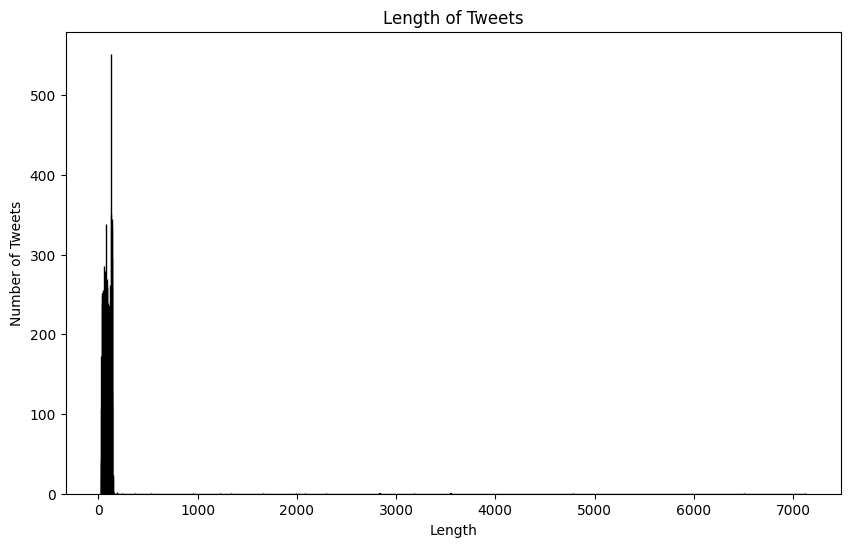

In [324]:

# Create a histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(training_data['length'], bins=5000, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Length of Tweets')
plt.xlabel('Length')
plt.ylabel('Number of Tweets')
plt.show()

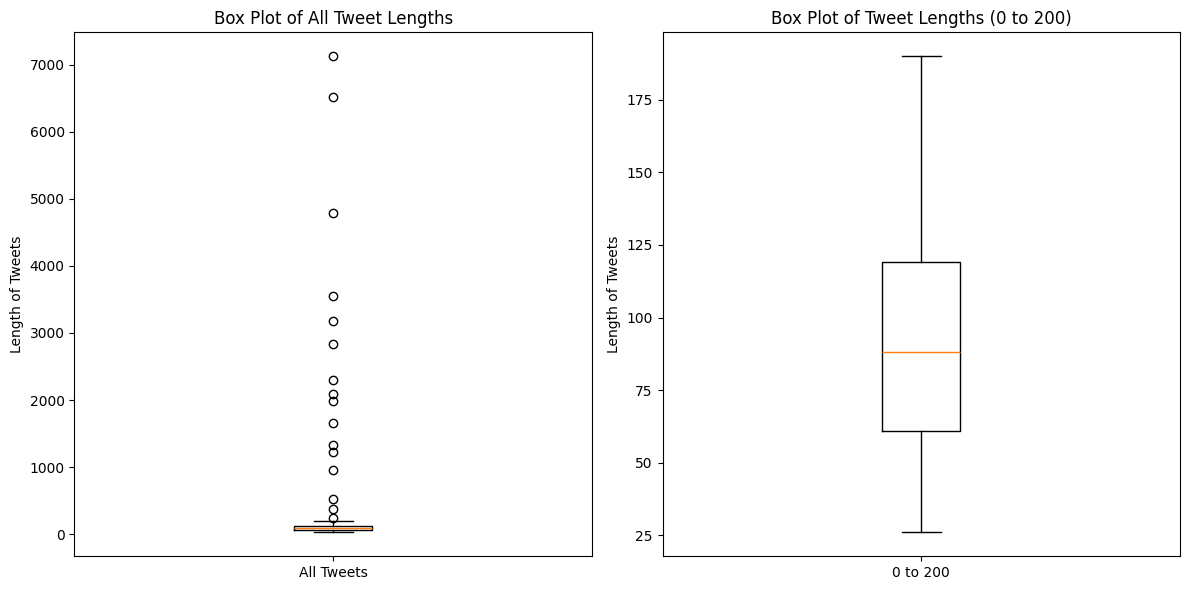

In [325]:

# Calculate the length of each tweet
training_data['length'] = training_data['tweetText'].str.len()

# Create a figure and a set of subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot for all tweet lengths
axes[0].boxplot(training_data['length'])
axes[0].set_title('Box Plot of All Tweet Lengths')
axes[0].set_ylabel('Length of Tweets')
axes[0].set_xticklabels(['All Tweets'])

# Filter the data for lengths from 0 to 200
filtered_data = training_data[training_data['length'] <= 200]

# Box plot for filtered tweet lengths (0 to 200)
axes[1].boxplot(filtered_data['length'])
axes[1].set_title('Box Plot of Tweet Lengths (0 to 200)')
axes[1].set_ylabel('Length of Tweets')
axes[1].set_xticklabels(['0 to 200'])

# Show the plot
plt.tight_layout()
plt.show()



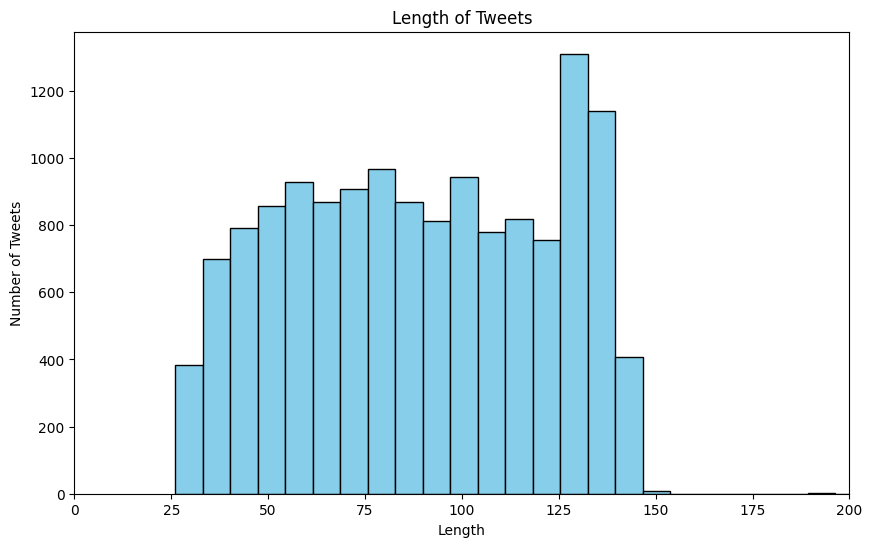

In [326]:
plt.figure(figsize=(10, 6))
plt.hist(training_data['length'], bins=1000, color='skyblue', edgecolor='black')
plt.title('Length of Tweets')
plt.xlabel('Length')
plt.ylabel('Number of Tweets')
plt.xlim(0, 200)  # Set the x-axis range from 0 to 200
plt.show()

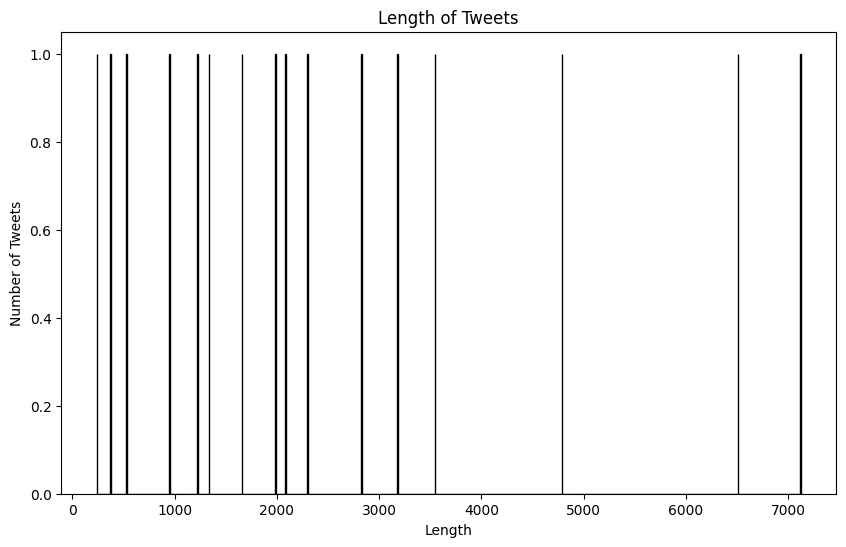

In [327]:
plt.figure(figsize=(10, 6))
long_tweets = training_data[training_data['length'] > 200]
plt.hist(long_tweets["length"], bins=1000, color='skyblue', edgecolor='black')
plt.title('Length of Tweets')
plt.xlabel('Length')
plt.ylabel('Number of Tweets')

plt.show()

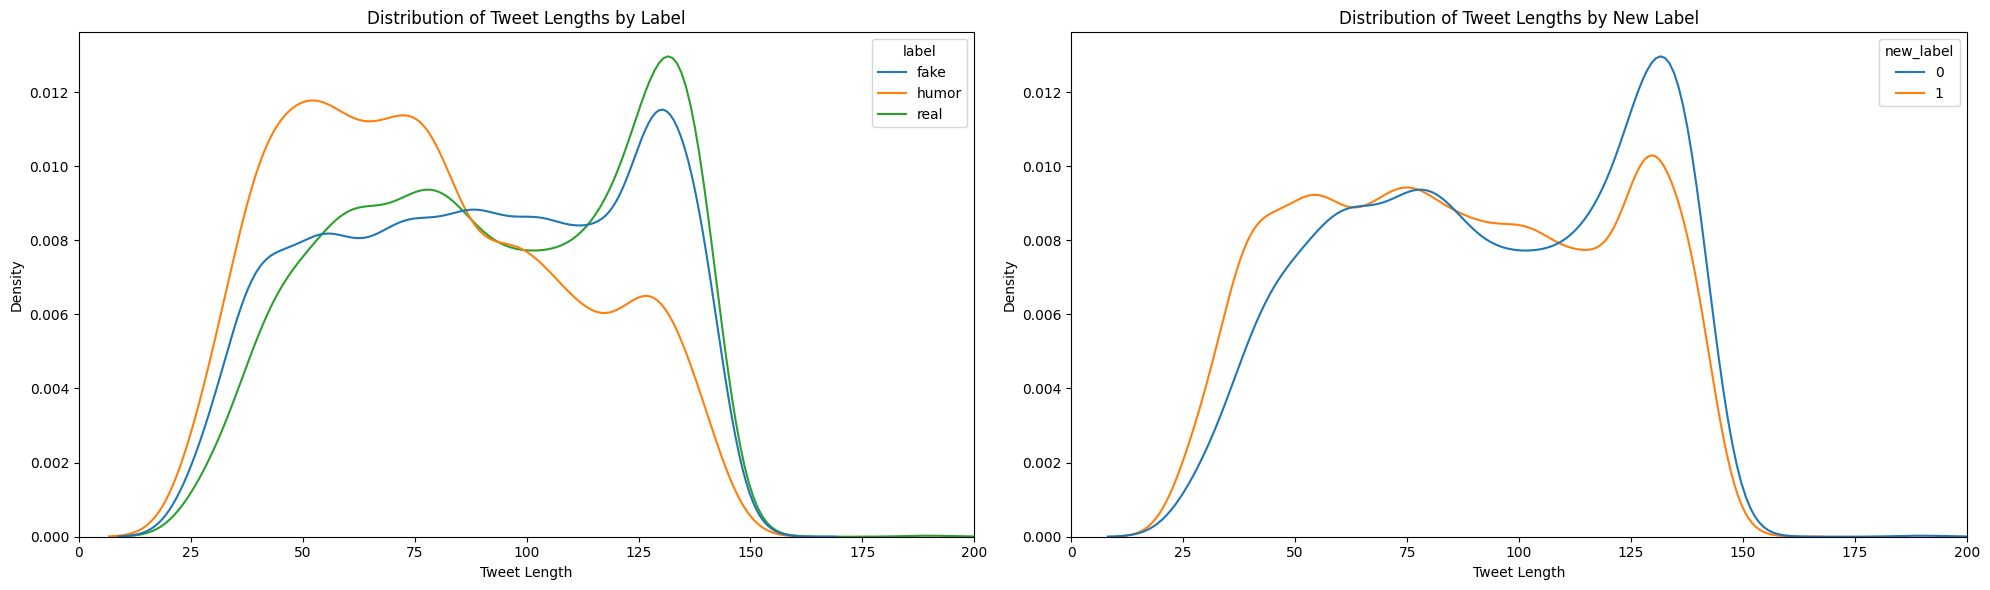

In [328]:
# Filtering the data to include only lengths from 0 to 200
filtered_data = training_data[training_data['length'] <= 200]

# Setting up a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plotting the KDE plot for the 'label' column
sns.kdeplot(data=filtered_data, x='length', hue='label', common_norm=False, ax=axes[0])
axes[0].set_title('Distribution of Tweet Lengths by Label')
axes[0].set_xlabel('Tweet Length')
axes[0].set_ylabel('Density')
axes[0].set_xlim(0, 200)

# Plotting the KDE plot for the 'new_label' column
sns.kdeplot(data=filtered_data, x='length', hue='new_label', common_norm=False, ax=axes[1])
axes[1].set_title('Distribution of Tweet Lengths by New Label')
axes[1].set_xlabel('Tweet Length')
axes[1].set_ylabel('Density')
axes[1].set_xlim(0, 200)

plt.tight_layout()
plt.show()



In [329]:
from scipy.stats import ks_2samp

# Assuming your DataFrame is named 'training_data' and contains the 'new_label' column
group_0 = training_data[training_data['new_label'] == 0]['length']
group_1 = training_data[training_data['new_label'] == 1]['length']

# Perform the KS test
ks_statistic, p_value = ks_2samp(group_0, group_1)

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

KS Statistic: 0.07890210429532227
P-Value: 6.5536373467967724e-18


#### Language of TweetText


In [330]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Set seed for langdetect to get consistent results
DetectorFactory.seed = 0

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.DataFrame({'tweetText': ['This is an English text.', 'Este es un texto en español.']})

# Define a function to detect language
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Apply the function to your DataFrame
training_data['lang'] = training_data['tweetText'].apply(detect_language)
testing_data['lang'] = testing_data['tweetText'].apply(detect_language)

# Display the DataFrame
print(training_data.head())


              tweetId                                          tweetText  \
0  263046056240115712  ¿Se acuerdan de la película: “El día después d...   
1  262995061304852481  @milenagimon: Miren a Sandy en NY!  Tremenda i...   
2  262979898002534400  Buena la foto del Huracán Sandy, me recuerda a...   
3  262996108400271360     Scary shit #hurricane #NY http://t.co/e4JLBUfH   
4  263018881839411200  My fave place in the world #nyc #hurricane #sa...   

      userId      imageId(s)        username                       timestamp  \
0   21226711  sandyA_fake_46         iAnnieM  Mon Oct 29 22:34:01 +0000 2012   
1  192378571  sandyA_fake_09  CarlosVerareal  Mon Oct 29 19:11:23 +0000 2012   
2  132303095  sandyA_fake_09     LucasPalape  Mon Oct 29 18:11:08 +0000 2012   
3  241995902  sandyA_fake_29     Haaaaarryyy  Mon Oct 29 19:15:33 +0000 2012   
4  250315890  sandyA_fake_15  princess__natt  Mon Oct 29 20:46:02 +0000 2012   

  label  new_label  length lang  
0  fake          1     134  

In [331]:
training_data['lang'].value_counts()

lang
en         10956
es          1300
tl           323
fr           220
id           177
pt           161
so           127
de           125
it           102
cy            96
nl            89
ar            80
af            69
ru            60
sv            46
pl            40
no            38
tr            33
ca            33
da            23
ja            21
th            19
et            14
fi            13
sk            13
vi            12
bg            10
zh-cn         10
sw             9
sl             8
lt             8
ro             7
hu             6
ko             6
el             5
hr             5
fa             3
sq             3
cs             2
mk             1
hi             1
he             1
unknown        1
lv             1
Name: count, dtype: int64

In [332]:
testing_data['lang'].value_counts()

lang
en    2699
so     592
ar     172
es      64
de      41
pt      39
fr      33
nl      21
it      17
tr      13
ca      11
id       7
cy       5
hi       5
fi       4
af       4
sq       4
el       3
tl       3
te       2
th       2
vi       2
ja       2
pl       2
ru       1
sv       1
ta       1
et       1
ko       1
bg       1
hr       1
lt       1
Name: count, dtype: int64

In [333]:
# Get the unique languages in the training_data and testing_data dataframes
training_languages = set(training_data['lang'])
testing_languages = set(testing_data['lang'])

# Find the languages that occur in the testing_data but not in the training_data
languages_only_in_testing = testing_languages - training_languages

# Count the number of languages that occur in the testing_data but not in the training_data
num_languages_only_in_testing = len(languages_only_in_testing)

# List the languages that occur in the testing_data but not in the training_data
languages_list = list(languages_only_in_testing)

# Print the result
print(f"The number of languages that occur in the testing_data but not in the training_data is: {num_languages_only_in_testing}")
print(f"The languages that occur in the testing_data but not in the training_data are: {languages_list}")


The number of languages that occur in the testing_data but not in the training_data is: 2
The languages that occur in the testing_data but not in the training_data are: ['te', 'ta']


In [334]:
def count_lang_tweets_with_label_details(dataframe, lang_column='lang', label_column='new_label'):
    """
    Count the total number and the percentage of English and non-English tweets in a DataFrame, split by label.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing the tweet data.
    lang_column (str): Name of the column containing language codes.
    label_column (str): Name of the column containing label.

    Returns:
    dict: A dictionary containing the counts and percentages of English and non-English tweets, split by label.
    """
    # Filter English and non-English tweets
    english_tweets = dataframe[dataframe[lang_column] == 'en']
    non_english_tweets = dataframe[dataframe[lang_column] != 'en']

    # Calculate percentages and counts for each label
    def calculate_details(series):
        total = series.sum()
        percentages = {label: (count / total * 100) for label, count in series.items()}
        return total, percentages

    total_en, en_label_details = calculate_details(english_tweets[label_column].value_counts())
    total_non_en, non_en_label_details = calculate_details(non_english_tweets[label_column].value_counts())

    return {
        'english': {'total': total_en, 'details': en_label_details},
        'non_english': {'total': total_non_en, 'details': non_en_label_details}
    }

# Example usage with training_data
details_training = count_lang_tweets_with_label_details(training_data)
print(f"Number of English tweets in training data: {details_training['english']['total']} (0: {details_training['english']['details'].get(0, 0):.2f}%, 1: {details_training['english']['details'].get(1, 0):.2f}%)")
print(f"Number of non-English tweets in training data: {details_training['non_english']['total']} (0: {details_training['non_english']['details'].get(0, 0):.2f}%, 1: {details_training['non_english']['details'].get(1, 0):.2f}%)")

# Example usage with testing_data
details_testing = count_lang_tweets_with_label_details(testing_data)
print(f"Number of English tweets in testing data: {details_testing['english']['total']} (0: {details_testing['english']['details'].get(0, 0):.2f}%, 1: {details_testing['english']['details'].get(1, 0):.2f}%)")
print(f"Number of non-English tweets in testing data: {details_testing['non_english']['total']} (0: {details_testing['non_english']['details'].get(0, 0):.2f}%, 1: {details_testing['non_english']['details'].get(1, 0):.2f}%)")



Number of English tweets in training data: 10956 (0: 37.21%, 1: 62.79%)
Number of non-English tweets in training data: 3321 (0: 25.41%, 1: 74.59%)
Number of English tweets in testing data: 2699 (0: 42.42%, 1: 57.58%)
Number of non-English tweets in testing data: 1056 (0: 6.06%, 1: 93.94%)


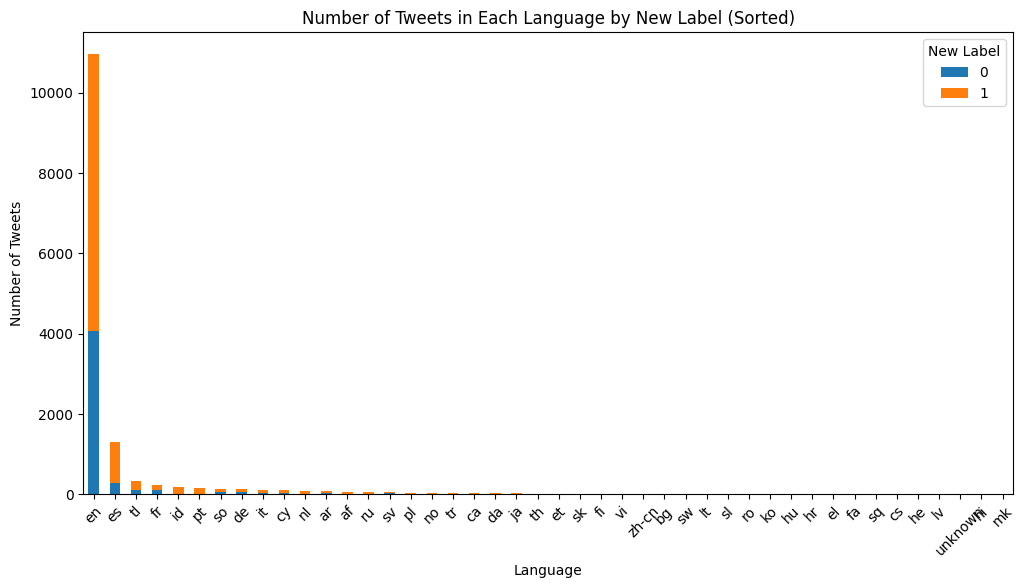

In [335]:


# Grouping the data by 'lang' and 'new_label' and counting the occurrences
grouped_language_counts = training_data.groupby(['lang', 'new_label']).size().unstack(fill_value=0)

# Calculate the total number of tweets for each language
grouped_language_counts['total'] = grouped_language_counts.sum(axis=1)

# Sort the DataFrame based on the total number of tweets
grouped_language_counts_sorted = grouped_language_counts.sort_values(by='total', ascending=False)

# Dropping the 'total' column as it's no longer needed in the plot
grouped_language_counts_sorted = grouped_language_counts_sorted.drop(columns='total')

# Plotting the sorted counts as a grouped bar plot
plt.figure(figsize=(12, 6))
grouped_language_counts_sorted.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Number of Tweets in Each Language by New Label (Sorted)')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.legend(title='New Label')
plt.show()


In [336]:
import re

def contains_emoji(s):
    """
    Check if the input string contains any emoji using a regex pattern.
    """
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return bool(emoji_pattern.search(s))

# Counting the number of rows with emojis
emoji_count = training_data['tweetText'].apply(contains_emoji).sum()

print(f"Number of rows with emojis: {emoji_count}")


Number of rows with emojis: 881


In [337]:
# Filtering the DataFrame for rows with emojis
rows_with_emojis = training_data[training_data['tweetText'].apply(contains_emoji)]

# Displaying the first 10 rows that contain emojis
rows_with_emojis.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en
12,263091320871063552,#shark #newjersey #swim #sandy #hurricane  ...,51599800,sandyA_fake_11,anaceciggt,Tue Oct 30 01:33:53 +0000 2012,fake,1,66,en
22,263010650517807104,My cousin sent this to me... :: Cleveland voic...,101839785,sandyA_fake_25,Fcking_AWESOME,Mon Oct 29 20:13:20 +0000 2012,fake,1,125,en
26,263404091718389760,This is sooo cute! #puupy #dog #hurricane #san...,330337969,sandyA_fake_35,jennn619,Tue Oct 30 22:16:43 +0000 2012,fake,1,129,en
41,263066368713318400,UMMMM😳 #shark #hurricane #nj WOAHH http://t.co...,263410461,sandyA_fake_11,isaigraham,Mon Oct 29 23:54:44 +0000 2012,fake,1,55,sq
44,263079860778459136,uh #hurricane #sandy #wind #blowing #cloudy #w...,402783766,sandyA_fake_08,jamiesaunders95,Tue Oct 30 00:48:21 +0000 2012,fake,1,83,en
49,263092194703982593,😱 #shark #nyc #streets #sandy #hurricane http:...,51555122,sandyA_fake_05,josafatperez,Tue Oct 30 01:37:21 +0000 2012,fake,1,61,en
50,263677446304448512,A picture someone took of a shark swimming by ...,342294638,sandyA_fake_11,TheSergioB,Wed Oct 31 16:22:56 +0000 2012,fake,1,130,en
53,263107402868592640,#2012 #statueofliberty #NYC #world #ends #hurr...,585473986,sandyA_fake_06,mythicals1,Tue Oct 30 02:37:47 +0000 2012,fake,1,82,en
60,262964239646457856,#Hurricane #Sandy #NYC 🌀☔🗽 http://t.co/gNLZiF29,128002276,sandyA_fake_29,JoshTroyG,Mon Oct 29 17:08:55 +0000 2012,fake,1,47,en


In [338]:
# Calculate the proportion of uppercase letters in real tweets
real_tweets = training_data[training_data['new_label'] == 0]['tweetText']
real_proportion = real_tweets.str.count(r'[A-Z]').sum() / real_tweets.str.len().sum()

# Calculate the proportion of uppercase letters in fake tweets
fake_tweets = training_data[training_data['new_label'] == 1]['tweetText']
fake_proportion = fake_tweets.str.count(r'[A-Z]').sum() / fake_tweets.str.len().sum()

# Print the results
print(f"Proportion of uppercase letters in real tweets: {real_proportion:.2%}")
print(f"Proportion of uppercase letters in fake tweets: {fake_proportion:.2%}")


Proportion of uppercase letters in real tweets: 10.85%
Proportion of uppercase letters in fake tweets: 10.19%


## ImageIds Analysis


In [339]:
training_data["imageId(s)"].describe()

count              14277
unique               377
top       sandyA_fake_29
freq                1100
Name: imageId(s), dtype: object

In [340]:
import pandas as pd

# Refactored helper function to add imageId quantity
def count_images_per_tweet(dataframe):

    def count_images(image_ids):
        return 0 if pd.isna(image_ids) else len(str(image_ids).split(','))

    result_df = dataframe.copy()
    result_df['num_images'] = result_df['imageId(s)'].apply(count_images)
    return result_df

# Applying the refactored function to training_data
refactored_df = count_images_per_tweet(training_data)

# Counting the number of tweets for each number of images
count_per_image = refactored_df['num_images'].value_counts().sort_index()

# Printing the counts using a different iteration method
for image_count in count_per_image.index:
    print(f"Number of tweets with {image_count} images: {count_per_image[image_count]}")



Number of tweets with 1 images: 14148
Number of tweets with 2 images: 121
Number of tweets with 3 images: 6
Number of tweets with 4 images: 1
Number of tweets with 5 images: 1


In [341]:
training_data.loc[count_images_per_tweet(training_data)['num_images'].idxmax()]


tweetId                                      325051231968059394
tweetText     Share this. Possible suspect in Boston Bombing...
userId                                                616188525
imageId(s)    boston_real_02,boston_real_03,boston_real_04,b...
username                                            the_guz_man
timestamp                        Fri Apr 19 01:00:27 +0000 2013
label                                                      real
new_label                                                     0
length                                                       77
lang                                                         en
Name: 12759, dtype: object

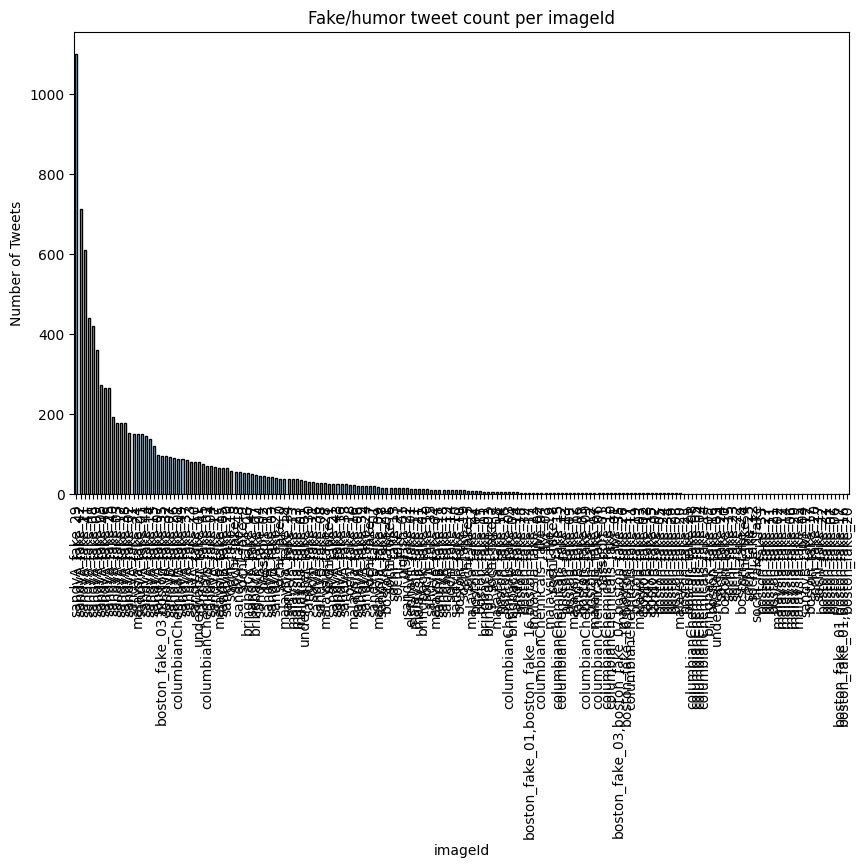

In [342]:
# Filter the data to include only fake/humor tweets
fake_tweets = training_data[training_data['new_label'] == 1]

# Count the number of fake tweets per imageId
imageId_counts = fake_tweets['imageId(s)'].value_counts().sort_values(ascending=False)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
imageId_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Fake/humor tweet count per imageId')
plt.xlabel('imageId')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


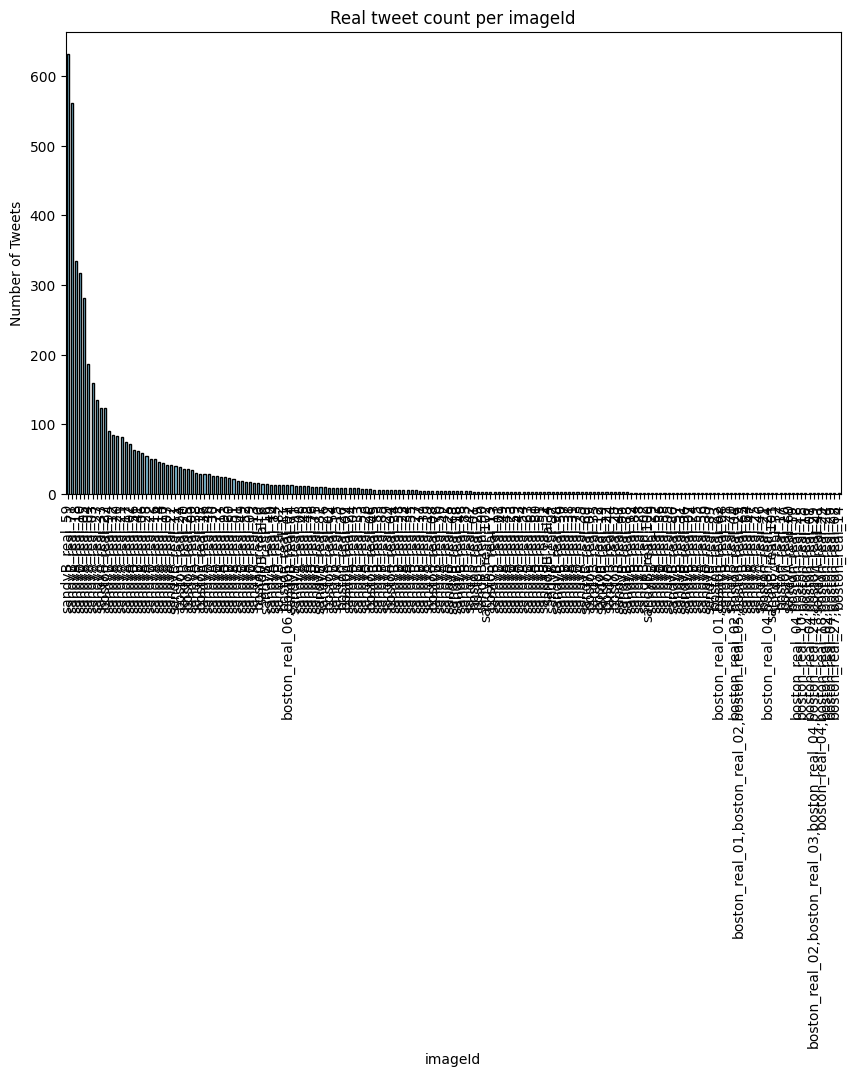

In [343]:
# Filter the data to include only fake/humor tweets
fake_tweets = training_data[training_data['new_label'] == 0]

# Count the number of fake tweets per imageId
imageId_counts = fake_tweets['imageId(s)'].value_counts().sort_values(ascending=False)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
imageId_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Real tweet count per imageId')
plt.xlabel('imageId')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [344]:


# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.DataFrame({'imgs': ['image1_name.jpg,image2_name.jpg', 'image3_name.jpg,image4_name.jpg']})

def process_img_names(img_names):
    if isinstance(img_names, str):
        # Split each image name at the first underscore and take the first part
        processed_names = [img.split('_')[0] for img in img_names.split(',')]
        # Join the processed names back into a single string separated by commas
        return ','.join(processed_names)
    else:
        # Return empty string or NaN if the original value is not a string
        return ''

# Apply the function to the imgs column
training_data['short_imgs'] = training_data['imageId(s)'].apply(process_img_names)



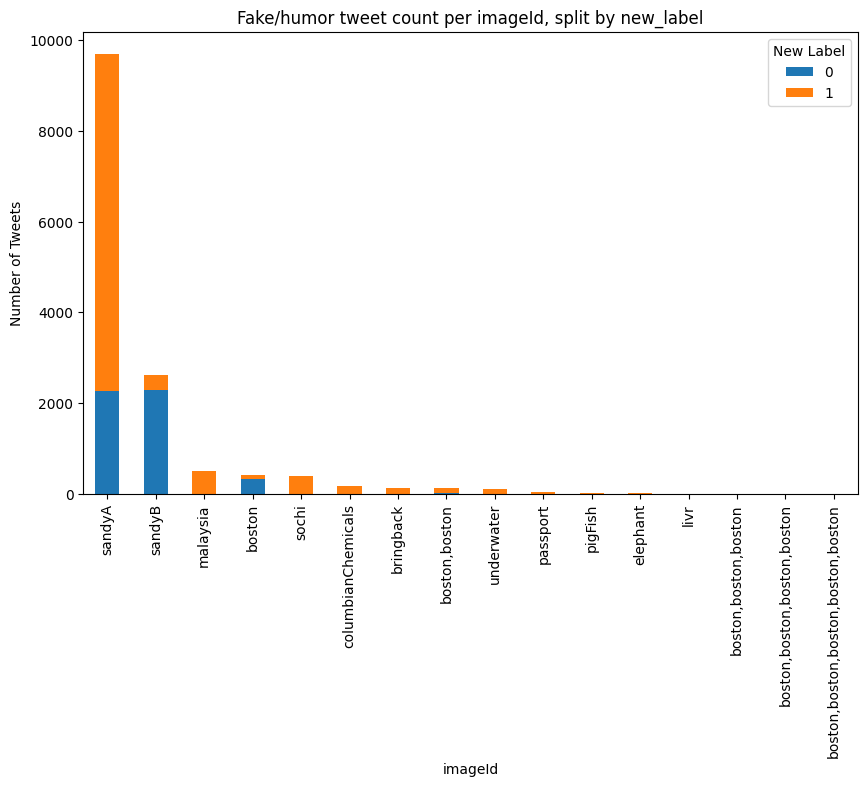

In [345]:
# Filter the data to include only fake/humor tweets


# Group the data by 'short_imgs' and 'new_label', then count the occurrences
grouped_counts = training_data.groupby(['short_imgs', 'new_label']).size().unstack(fill_value=0)

# Sort by total counts for each 'short_imgs'
grouped_counts['total'] = grouped_counts.sum(axis=1)
grouped_counts_sorted = grouped_counts.sort_values(by='total', ascending=False)
del grouped_counts_sorted['total']  # Remove the total column as it's no longer needed

# Create a stacked bar plot using Matplotlib
plt.figure(figsize=(10, 6))
grouped_counts_sorted.plot(kind='bar', stacked=True, ax=plt.gca())

# Set the title and labels
plt.title('Fake/humor tweet count per imageId, split by new_label')
plt.xlabel('imageId')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='New Label')
plt.show()


### Time Stamp Analysis

In [346]:


from dateutil import parser


# Define a custom function to handle the datetime conversion
def parse_datetime(dt_string):
    try:
        return parser.parse(dt_string)
    except ValueError:
        return pd.NaT  # Return 'Not a Time' for unparseable formats

# Apply this function to the 'timestamp' column
training_data['date'] = training_data['timestamp'].apply(parse_datetime)
training_data.head()


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang,short_imgs,date
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,1,134,es,sandyA,2012-10-29 22:34:01+00:00
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,1,133,es,sandyA,2012-10-29 19:11:23+00:00
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,1,116,es,sandyA,2012-10-29 18:11:08+00:00
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,1,46,en,sandyA,2012-10-29 19:15:33+00:00
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en,sandyA,2012-10-29 20:46:02+00:00


In [347]:


# Extract the day of the week
training_data['day_of_week'] = training_data['date'].dt.day_name()

# Group by label and day_of_week and count occurrences
posts_per_day_label = training_data.groupby(['new_label', 'day_of_week']).size().unstack(fill_value=0)

# Reordering the columns to have days in order
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
posts_per_day_label = posts_per_day_label[days_order]

# Print the result
print(posts_per_day_label)



day_of_week  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
new_label                                                                  
0               520     1343        274       897     701       492     694
1              3183     3021        575      1085     678       402     389


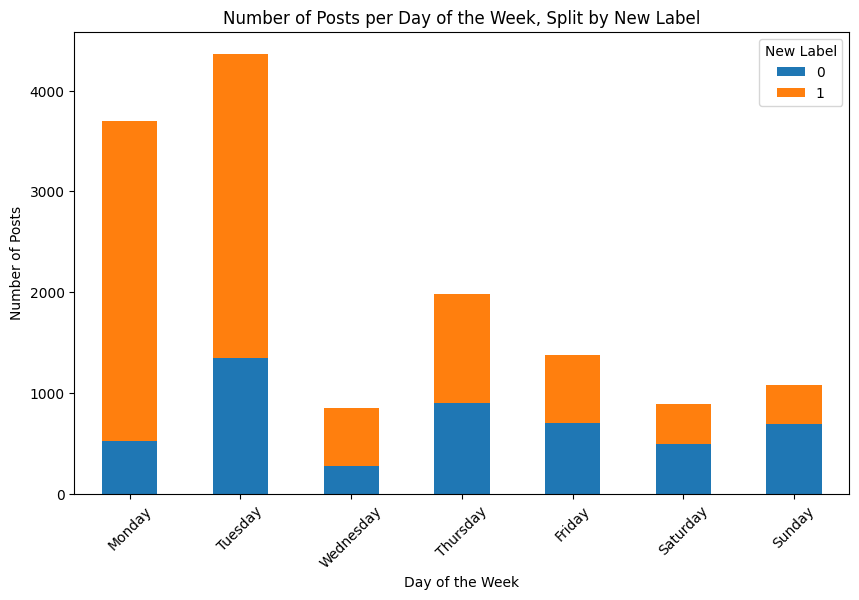

In [348]:


# Sample data preparation (replace this with your actual DataFrame)
# For example purposes, let's create a DataFrame
# training_data = pd.DataFrame({
#     'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday'],
#     'new_label': [0, 0, 1, 1, 0, 0, 1, 1, 0],
# })

# Group by day_of_week and new_label and count occurrences
posts_per_day_new_label = training_data.groupby(['day_of_week', 'new_label']).size().unstack(fill_value=0)

# Reordering the index to have days in order
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
posts_per_day_new_label = posts_per_day_new_label.reindex(days_order)

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
posts_per_day_new_label.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Number of Posts per Day of the Week, Split by New Label')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='New Label', loc='upper right')
plt.show()


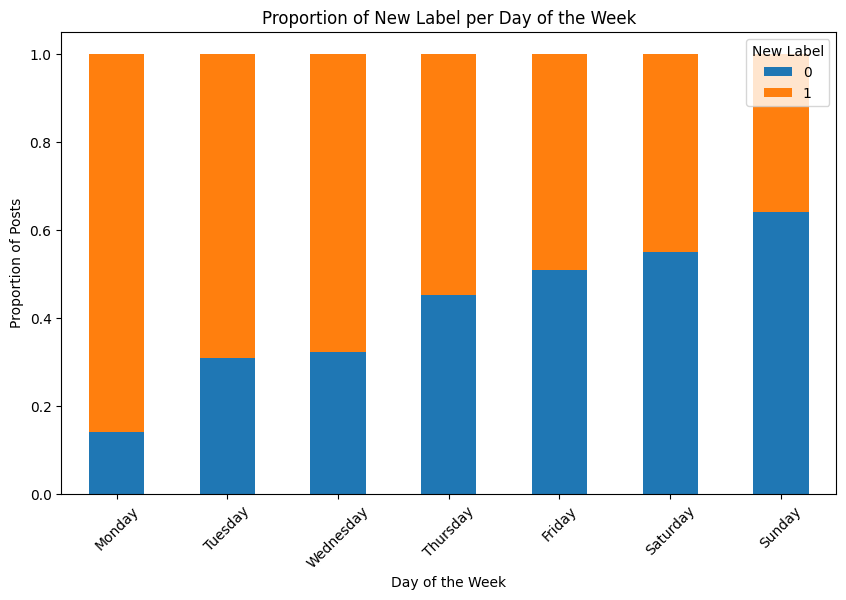

In [349]:

# Sample data preparation (replace this with your actual DataFrame)
# For example purposes, let's create a DataFrame
# training_data = pd.DataFrame({
#     'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday'],
#     'new_label': [0, 0, 1, 1, 0, 0, 1, 1, 0],
# })

# Group by day_of_week and new_label and count occurrences
posts_per_day_new_label = training_data.groupby(['day_of_week', 'new_label']).size().unstack(fill_value=0)

# Reordering the index to have days in order
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
posts_per_day_new_label = posts_per_day_new_label.reindex(days_order)

# Normalize the counts to get proportions
posts_per_day_new_label_proportion = posts_per_day_new_label.div(posts_per_day_new_label.sum(axis=1), axis=0)

# Plotting the stacked bar chart with proportions
plt.figure(figsize=(10, 6))
posts_per_day_new_label_proportion.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Proportion of New Label per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of Posts')
plt.xticks(rotation=45)
plt.legend(title='New Label', loc='upper right')
plt.show()


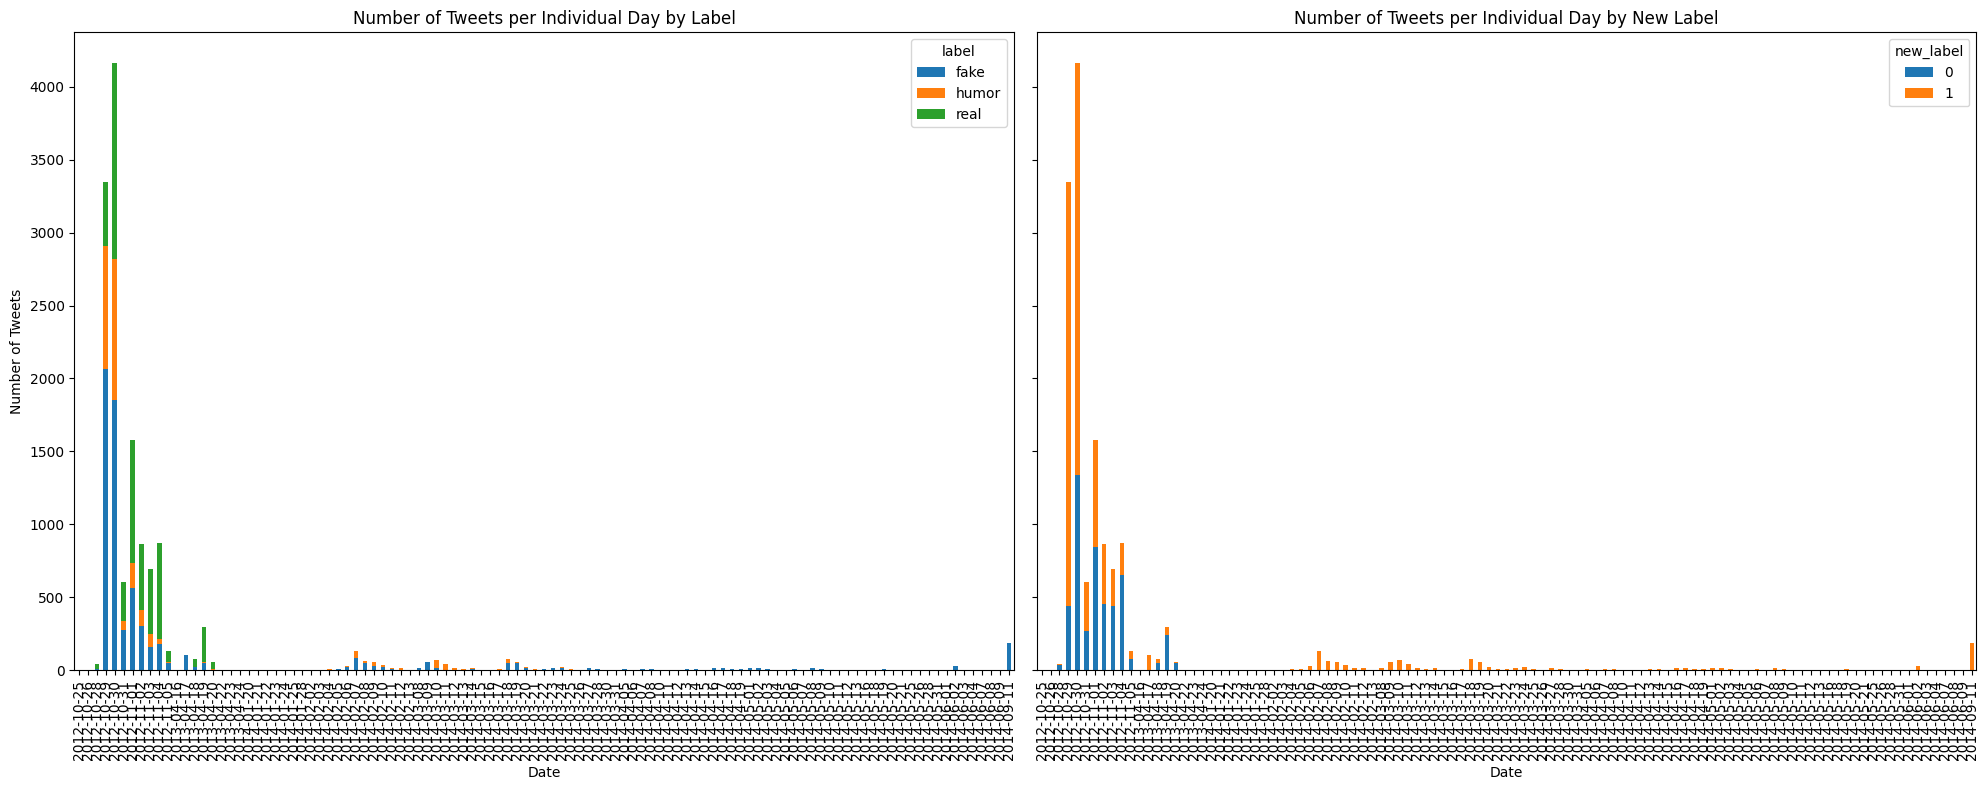

In [350]:
import matplotlib.pyplot as plt

# Group the data by date and 'label'
posts_per_label = training_data.groupby([training_data['date'].dt.date, 'label']).size().unstack(fill_value=0)

# Group the data by date and 'new_label'
posts_per_new_label = training_data.groupby([training_data['date'].dt.date, 'new_label']).size().unstack(fill_value=0)

# Sort both DataFrames by date
posts_per_label.sort_index(inplace=True)
posts_per_new_label.sort_index(inplace=True)

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True)

# Plotting the stacked bar chart for 'label'
posts_per_label.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Number of Tweets per Individual Day by Label')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Tweets')
axes[0].tick_params(axis='x', rotation=90)

# Plotting the stacked bar chart for 'new_label'
posts_per_new_label.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Number of Tweets per Individual Day by New Label')
axes[1].set_xlabel('Date')
# axes[1].set_ylabel('Number of Tweets')  # Already shared with the first plot
axes[1].tick_params(axis='x', rotation=90)

# Set a tight layout and show the plot
plt.tight_layout()
plt.show()



## Data Preprocessing


In [351]:

# Assuming your DataFrame is loaded as training_data
# training_data = pd.read_csv('your_dataset.csv')

# Consolidate all regular expression patterns into one
combined_pattern = r"(RT|rt|MT|mt|RP|rp):? @\w*:?|\bRT\b|\brt\b|\bMT\b|\bmt\b|\bRP\b|\brp\b|@\w*:|#rt|#RT|#mt|#MT|#rp|#retweet|#Retweet|#modifiedtweet|#modifiedTweet|#ModifiedTweet|#repost|#Repost|via @\w*"

# Use a single line to filter out tweets that match the pattern
training_data = training_data[~training_data['tweetText'].str.contains(combined_pattern, flags=re.IGNORECASE)]

# Reset the DataFrame index
training_data.reset_index(drop=True, inplace=True)

# Print new shape of DataFrame
print(training_data.shape)


(11433, 13)


C:\Users\jimmy\AppData\Local\Temp\ipykernel_20632\2511666550.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  training_data = training_data[~training_data['tweetText'].str.contains(combined_pattern, flags=re.IGNORECASE)]


In [352]:

longTweets = training_data[training_data['length'] > 200]
print(longTweets.head())

print(longTweets["tweetText"].describe())

                 tweetId                                          tweetText  \
5544  262994094639415296  since 1937, the tomb soldiers have never left ...   
7794  263068178526121984  el mar se metio a Manhatan #EnEsteMomento #San...   

         userId      imageId(s) username                       timestamp  \
5544  309867407  sandyA_fake_09   flon3s  Mon Oct 29 23:51:43 +0000 2012   
7794    6117452  sandyA_real_03  thepete  Tue Oct 30 01:33:55 +0000 2012   

     label  new_label  length lang short_imgs                      date  \
5544  fake          1    2833   en     sandyA 2012-10-29 23:51:43+00:00   
7794  real          0    2083   en     sandyA 2012-10-30 01:33:55+00:00   

     day_of_week  
5544      Monday  
7794     Tuesday  
count                                                     2
unique                                                    2
top       since 1937, the tomb soldiers have never left ...
freq                                                      1
Name: twee

In [353]:
#Cut of point editied for best result
# Filter out rows where 'length' is greater than or equal to 240
training_data = training_data[training_data['length'] < 200]

# Reset the index to be continuous
training_data.reset_index(drop=True, inplace=True)


In [354]:
training_data.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang,short_imgs,date,day_of_week
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,1,134,es,sandyA,2012-10-29 22:34:01+00:00,Monday
1,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,1,116,es,sandyA,2012-10-29 18:11:08+00:00,Monday
2,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,1,46,en,sandyA,2012-10-29 19:15:33+00:00,Monday
3,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en,sandyA,2012-10-29 20:46:02+00:00,Monday
4,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,1,63,en,sandyA,2012-10-30 19:39:10+00:00,Tuesday


In [355]:
def basicPreProcessing(text):
    # Making the text lowercase
    text = text.lower()

    # Removing the urls
    text = re.sub(r"http\S+", "", text)
    
    # Removing the @mentions
    text = re.sub(r"@\S+", "", text)

    # Removing the punctuations and other symbols
    text = re.sub(r'[^\w\s]|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002702-\U000027B0\U000024C2-\U0001F251]', '', text)


    return text

# Apply the function to the 'tweetText' column
training_data['cleanText'] = training_data['tweetText'].apply(basicPreProcessing)
testing_data['cleanText'] = testing_data['tweetText'].apply(basicPreProcessing)

training_data.head()



,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang,short_imgs,date,day_of_week,cleanText
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,1,134,es,sandyA,2012-10-29 22:34:01+00:00,Monday,se acuerdan de la película el día después de m...
1,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,1,116,es,sandyA,2012-10-29 18:11:08+00:00,Monday,buena la foto del huracán sandy me recuerda a ...
2,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,1,46,en,sandyA,2012-10-29 19:15:33+00:00,Monday,scary shit hurricane ny
3,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en,sandyA,2012-10-29 20:46:02+00:00,Monday,my fave place in the world nyc hurricane sandy...
4,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,1,63,en,sandyA,2012-10-30 19:39:10+00:00,Tuesday,42nd time square nyc subway hurricane


In [356]:
training_data.drop_duplicates(subset=['cleanText'], keep='first', inplace=True, ignore_index = True)
training_data["cleanText"].describe()

count                                                  9079
unique                                                 9079
top       se acuerdan de la película el día después de m...
freq                                                      1
Name: cleanText, dtype: object

## Tranllsation


In [357]:


# rows_that_need_translation = training_data[training_data['lang'] != 'en']
# rows_that_need_translation.head()

In [358]:
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# tokenizer = AutoTokenizer.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
# model = AutoModelForSeq2SeqLM.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

# def batch_translate(texts):
#     # Tokenize the texts and prepare for model input
#     tokenized = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
#     # Translate and decode the output
#     translated = model.generate(**tokenized)
#     return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

# # Filter rows that need translation
# rows_that_need_translation = training_data[training_data['lang'] != 'en']

# # Batch translation
# batch_size = 10  # Adjust based on your resource constraints
# translated_texts = []
# for i in range(0, len(rows_that_need_translation), batch_size):
#     batch = rows_that_need_translation['cleanText'][i:i+batch_size].tolist()
#     translated_texts.extend(batch_translate(batch))

# # Combine the translated texts back into the original DataFrame
# training_data.loc[rows_that_need_translation.index, 'translated_text'] = translated_texts

# # For rows that are already in English, copy the original text
# training_data.loc[training_data['lang'] == 'en', 'translated_text'] = training_data['cleanText']

# # View the first few rows of the training data
# training_data.head()





## Continued Pre Processing

In [359]:
stopwords = nltk.corpus.stopwords.words()
stopwords.extend([':', ';', '[', ']', '"', "'", '(', ')', '.', '?', '#', '@', '...'])

training_data["cleanTextnoStop"] = training_data["cleanText"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
testing_data["cleanTextnoStop"] = testing_data["cleanText"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))



In [360]:
training_data.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang,short_imgs,date,day_of_week,cleanText,cleanTextnoStop
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,1,134,es,sandyA,2012-10-29 22:34:01+00:00,Monday,se acuerdan de la película el día después de m...,acuerdan película día después mañana recuerda ...
1,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,1,116,es,sandyA,2012-10-29 18:11:08+00:00,Monday,buena la foto del huracán sandy me recuerda a ...,buena foto huracán sandy recuerda película día...
2,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,1,46,en,sandyA,2012-10-29 19:15:33+00:00,Monday,scary shit hurricane ny,scary shit hurricane ny
3,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en,sandyA,2012-10-29 20:46:02+00:00,Monday,my fave place in the world nyc hurricane sandy...,fave place world nyc hurricane sandy statueofl...
4,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,1,63,en,sandyA,2012-10-30 19:39:10+00:00,Tuesday,42nd time square nyc subway hurricane,42nd time square nyc subway hurricane


In [361]:

import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('wordnet')

# Initialize the tokenizer, lemmatizer, and stemmer
tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function to apply lemmatization
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)])

# Function to apply stemming
def stem_text(text):
    return ' '.join([stemmer.stem(w) for w in tokenizer.tokenize(text)])

# Apply lemmatization and stemming to training and testing data
training_data['cleanTextLem'] = training_data['cleanTextnoStop'].apply(lemmatize_text)
testing_data['cleanTextLem'] = testing_data['cleanTextnoStop'].apply(lemmatize_text)

training_data['cleanTextStem'] = training_data['cleanTextnoStop'].apply(stem_text)
testing_data['cleanTextStem'] = testing_data['cleanTextnoStop'].apply(stem_text)

# Display the first 5 rows of the training data
training_data.head(5)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,new_label,length,lang,short_imgs,date,day_of_week,cleanText,cleanTextnoStop,cleanTextLem,cleanTextStem
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,1,134,es,sandyA,2012-10-29 22:34:01+00:00,Monday,se acuerdan de la película el día después de m...,acuerdan película día después mañana recuerda ...,acuerdan película día después mañana recuerda ...,acuerdan película día despué mañana recuerda p...
1,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,1,116,es,sandyA,2012-10-29 18:11:08+00:00,Monday,buena la foto del huracán sandy me recuerda a ...,buena foto huracán sandy recuerda película día...,buena foto huracán sandy recuerda película día...,buena foto huracán sandi recuerda película día...
2,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,1,46,en,sandyA,2012-10-29 19:15:33+00:00,Monday,scary shit hurricane ny,scary shit hurricane ny,scary shit hurricane ny,scari shit hurrican ny
3,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,1,89,en,sandyA,2012-10-29 20:46:02+00:00,Monday,my fave place in the world nyc hurricane sandy...,fave place world nyc hurricane sandy statueofl...,fave place world nyc hurricane sandy statueofl...,fave place world nyc hurrican sandi statueofli...
4,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,1,63,en,sandyA,2012-10-30 19:39:10+00:00,Tuesday,42nd time square nyc subway hurricane,42nd time square nyc subway hurricane,42nd time square nyc subway hurricane,42nd time squar nyc subway hurrican


## Algorithm Design and Training

In [362]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [363]:
training_feature0= training_data['cleanText']
testing_feature0 = testing_data['cleanText']
training_feature1= training_data['cleanTextnoStop']
testing_feature1 = testing_data['cleanTextnoStop']
training_feature2= training_data['cleanTextLem']
testing_feature2 = testing_data['cleanTextLem']
training_featur3= training_data['cleanTextStem']
testing_feature3 = testing_data['cleanTextStem']
training_label = training_data['new_label']
testing_label = testing_data['new_label']


In [364]:
# from sklearn.decomposition import TruncatedSVD

# # Assuming tfidf_train and tfidf_test are already created TF-IDF feature sets

# # Dimensionality analysis
# print("Original number of features:", tfidf_train.shape[1])
# print("Number of training samples:", tfidf_train.shape[0])

# # Check sparsity
# sparsity = 1.0 - (tfidf_train.nnz / float(tfidf_train.shape[0] * tfidf_train.shape[1]))
# print("Sparsity of TF-IDF matrix:", sparsity)

# # Dimensionality reduction using Truncated SVD
# n_components = 100  # You can choose a suitable number of components
# svd = TruncatedSVD(n_components=n_components)
# tfidf_train_reduced = svd.fit_transform(tfidf_train)
# tfidf_test_reduced = svd.transform(tfidf_test)

# # Explained variance ratio
# plt.plot(svd.explained_variance_ratio_.cumsum())
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by Different Number of Components')
# plt.show()

# # After dimensionality reduction
# print("Reduced number of features:", tfidf_train_reduced.shape[1])


In [387]:
# Define your classifiers in a dictionary
classifiers = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=0),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'SGDClassifier': SGDClassifier(),
    'LogisticRegression': LogisticRegression(),
    'LinearSVC': LinearSVC()
}

In [368]:
feature_sets = {
    'Original_Text': ('cleanText', CountVectorizer()),
    'Text_no_Stopwords': ('cleanTextnoStop', CountVectorizer()),
    'Lemmatized_Text': ('cleanTextLem', CountVectorizer()),
    'Stemmed_Text': ('cleanTextStem', CountVectorizer()),
    'Original_Text_NGrams_2': ('cleanText', CountVectorizer(ngram_range=(1, 2))),
    'Text_no_Stopwords_NGrams_2': ('cleanTextnoStop', CountVectorizer(ngram_range=(1, 2))),
    'Lemmatized_Text_NGrams_2': ('cleanTextLem', CountVectorizer(ngram_range=(1, 2))),
    'Stemmed_Text_NGrams_2': ('cleanTextStem', CountVectorizer(ngram_range=(1, 2))),
    'Original_Text_NGrams': ('cleanText', CountVectorizer(ngram_range=(1, 3))),
    'Text_no_Stopwords_NGrams': ('cleanTextnoStop', CountVectorizer(ngram_range=(1, 3))),
    'Lemmatized_Text_NGrams': ('cleanTextLem', CountVectorizer(ngram_range=(1, 3))),
    'Stemmed_Text_NGrams': ('cleanTextStem', CountVectorizer(ngram_range=(1, 3))),
    'Original_Text_TFIDF': ('cleanText', TfidfVectorizer()),
    'Text_no_Stopwords_TFIDF': ('cleanTextnoStop', TfidfVectorizer()),
    'Lemmatized_Text_TFIDF': ('cleanTextLem', TfidfVectorizer()),
    'Stemmed_Text_TFIDF': ('cleanTextStem', TfidfVectorizer()),
    'Original_Text_TFIDF_NGrams_2': ('cleanText', TfidfVectorizer(ngram_range=(1, 2))),
    'Text_no_Stopwords_TFIDF_NGrams_2': ('cleanTextnoStop', TfidfVectorizer(ngram_range=(1, 2))),
    'Lemmatized_Text_TFIDF_NGrams_2': ('cleanTextLem', TfidfVectorizer(ngram_range=(1, 2))),
    'Stemmed_Text_TFIDF_NGrams_2': ('cleanTextStem', TfidfVectorizer(ngram_range=(1, 2))),
    'Original_Text_TFIDF_NGrams': ('cleanText', TfidfVectorizer(ngram_range=(1, 3))),
    'Text_no_Stopwords_TFIDF_NGrams': ('cleanTextnoStop', TfidfVectorizer(ngram_range=(1, 3))),
    'Lemmatized_Text_TFIDF_NGrams': ('cleanTextLem', TfidfVectorizer(ngram_range=(1, 3))),
    'Stemmed_Text_TFIDF_NGrams': ('cleanTextStem', TfidfVectorizer(ngram_range=(1, 3))),
}

In [388]:
from sklearn.metrics import accuracy_score, f1_score
# Store results
results = []

# Iterate over classifiers and feature sets
for clf_name, clf in classifiers.items():
    for fs_name, (feature_column, vectorizer) in feature_sets.items():
        # Prepare training and testing data
        train_features = vectorizer.fit_transform(training_data[feature_column])
        test_features = vectorizer.transform(testing_data[feature_column])

        # Create a pipeline
        pipeline = Pipeline([
            ('classifier', clf)
        ])

        # Fit the classifier
        pipeline.fit(train_features, training_label)

        # Predict and calculate scores
        pred = pipeline.predict(test_features)
        accuracy = accuracy_score(testing_label, pred)
        f1 = f1_score(testing_label, pred, average='weighted')

        # Store results
        results.append((clf_name, fs_name, accuracy, f1))

        # Print results
        print(f"Classifier: {clf_name}, Feature Set: {fs_name}")
        print(f"  Accuracy: {accuracy:.3f}")
        print(f"  F1 Score: {f1:.3f}\n")

# Convert the results to a DataFrame for easier analysis and visualization
results_df = pd.DataFrame(results, columns=['Classifier', 'Feature Set', 'Accuracy', 'F1 Score'])
print(results_df)

Classifier: DecisionTreeClassifier, Feature Set: Original_Text
  Accuracy: 0.587
  F1 Score: 0.522

Classifier: DecisionTreeClassifier, Feature Set: Text_no_Stopwords
  Accuracy: 0.608
  F1 Score: 0.532

Classifier: DecisionTreeClassifier, Feature Set: Lemmatized_Text
  Accuracy: 0.842
  F1 Score: 0.842

Classifier: DecisionTreeClassifier, Feature Set: Stemmed_Text
  Accuracy: 0.626
  F1 Score: 0.548

Classifier: DecisionTreeClassifier, Feature Set: Original_Text_NGrams_2
  Accuracy: 0.590
  F1 Score: 0.520

Classifier: DecisionTreeClassifier, Feature Set: Text_no_Stopwords_NGrams_2
  Accuracy: 0.613
  F1 Score: 0.533

Classifier: DecisionTreeClassifier, Feature Set: Lemmatized_Text_NGrams_2
  Accuracy: 0.842
  F1 Score: 0.841

Classifier: DecisionTreeClassifier, Feature Set: Stemmed_Text_NGrams_2
  Accuracy: 0.905
  F1 Score: 0.903

Classifier: DecisionTreeClassifier, Feature Set: Original_Text_NGrams
  Accuracy: 0.596
  F1 Score: 0.525

Classifier: DecisionTreeClassifier, Feature Set

c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Text_no_Stopwords
  Accuracy: 0.672
  F1 Score: 0.658

Classifier: LinearSVC, Feature Set: Lemmatized_Text
  Accuracy: 0.811
  F1 Score: 0.813



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Stemmed_Text
  Accuracy: 0.803
  F1 Score: 0.805



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Original_Text_NGrams_2
  Accuracy: 0.702
  F1 Score: 0.666



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Text_no_Stopwords_NGrams_2
  Accuracy: 0.628
  F1 Score: 0.548



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Lemmatized_Text_NGrams_2
  Accuracy: 0.711
  F1 Score: 0.681

Classifier: LinearSVC, Feature Set: Stemmed_Text_NGrams_2
  Accuracy: 0.772
  F1 Score: 0.775



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Original_Text_NGrams
  Accuracy: 0.709
  F1 Score: 0.662



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Text_no_Stopwords_NGrams
  Accuracy: 0.645
  F1 Score: 0.550



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Lemmatized_Text_NGrams
  Accuracy: 0.720
  F1 Score: 0.679



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Stemmed_Text_NGrams
  Accuracy: 0.683
  F1 Score: 0.655

Classifier: LinearSVC, Feature Set: Original_Text_TFIDF
  Accuracy: 0.811
  F1 Score: 0.814

Classifier: LinearSVC, Feature Set: Text_no_Stopwords_TFIDF
  Accuracy: 0.779
  F1 Score: 0.784



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Lemmatized_Text_TFIDF
  Accuracy: 0.773
  F1 Score: 0.778

Classifier: LinearSVC, Feature Set: Stemmed_Text_TFIDF
  Accuracy: 0.772
  F1 Score: 0.777



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Original_Text_TFIDF_NGrams_2
  Accuracy: 0.814
  F1 Score: 0.817

Classifier: LinearSVC, Feature Set: Text_no_Stopwords_TFIDF_NGrams_2
  Accuracy: 0.805
  F1 Score: 0.805



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Lemmatized_Text_TFIDF_NGrams_2
  Accuracy: 0.821
  F1 Score: 0.820

Classifier: LinearSVC, Feature Set: Stemmed_Text_TFIDF_NGrams_2
  Accuracy: 0.522
  F1 Score: 0.529



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Original_Text_TFIDF_NGrams
  Accuracy: 0.811
  F1 Score: 0.814



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Text_no_Stopwords_TFIDF_NGrams
  Accuracy: 0.795
  F1 Score: 0.795



c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: LinearSVC, Feature Set: Lemmatized_Text_TFIDF_NGrams
  Accuracy: 0.826
  F1 Score: 0.825

Classifier: LinearSVC, Feature Set: Stemmed_Text_TFIDF_NGrams
  Accuracy: 0.783
  F1 Score: 0.787

                 Classifier                     Feature Set  Accuracy  \
0    DecisionTreeClassifier                   Original_Text  0.587217   
1    DecisionTreeClassifier               Text_no_Stopwords  0.607989   
2    DecisionTreeClassifier                 Lemmatized_Text  0.841545   
3    DecisionTreeClassifier                    Stemmed_Text  0.625566   
4    DecisionTreeClassifier          Original_Text_NGrams_2  0.590413   
..                      ...                             ...       ...   
139               LinearSVC     Stemmed_Text_TFIDF_NGrams_2  0.522237   
140               LinearSVC      Original_Text_TFIDF_NGrams  0.811185   
141               LinearSVC  Text_no_Stopwords_TFIDF_NGrams  0.795473   
142               LinearSVC    Lemmatized_Text_TFIDF_NGrams  0.825566

c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [389]:
# Sort the DataFrame by F1 Score in descending order
sorted_results_df = results_df.sort_values(by='F1 Score', ascending=False)

# Output the top 10 rows
top_10_results = sorted_results_df.head(10)
print(top_10_results)
#                 Classifier                     Feature Set  Accuracy  F1 Score
# 11  DecisionTreeClassifier             Stemmed_Text_NGrams  0.905726  0.902899
# 38           MultinomialNB           Lemmatized_Text_TFIDF  0.893742  0.890226
# 37           MultinomialNB         Text_no_Stopwords_TFIDF  0.889747  0.886190
# 36           MultinomialNB             Original_Text_TFIDF  0.890280  0.886031
# 43           MultinomialNB     Stemmed_Text_TFIDF_NGrams_2  0.887883  0.881711
# 42           MultinomialNB  Lemmatized_Text_TFIDF_NGrams_2  0.883888  0.877143
# 47           MultinomialNB       Stemmed_Text_TFIDF_NGrams  0.882557  0.874968
# 14  DecisionTreeClassifier           Lemmatized_Text_TFIDF  0.865513  0.863819
# 15  DecisionTreeClassifier              Stemmed_Text_TFIDF  0.856724  0.857148
# 23  DecisionTreeClassifier       Stemmed_Text_TFIDF_NGrams  0.856991  0.857099

                Classifier                     Feature Set  Accuracy  F1 Score
7   DecisionTreeClassifier           Stemmed_Text_NGrams_2  0.905459  0.902880
38           MultinomialNB           Lemmatized_Text_TFIDF  0.893742  0.890226
37           MultinomialNB         Text_no_Stopwords_TFIDF  0.889747  0.886190
36           MultinomialNB             Original_Text_TFIDF  0.890280  0.886031
43           MultinomialNB     Stemmed_Text_TFIDF_NGrams_2  0.887883  0.881711
42           MultinomialNB  Lemmatized_Text_TFIDF_NGrams_2  0.883888  0.877143
47           MultinomialNB       Stemmed_Text_TFIDF_NGrams  0.882557  0.874968
18  DecisionTreeClassifier  Lemmatized_Text_TFIDF_NGrams_2  0.867377  0.865654
23  DecisionTreeClassifier       Stemmed_Text_TFIDF_NGrams  0.851398  0.851929
19  DecisionTreeClassifier     Stemmed_Text_TFIDF_NGrams_2  0.849800  0.850838


In [391]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
feature_column = "cleanTextStem"
clf = DecisionTreeClassifier(random_state=0)
train_features = vectorizer.fit_transform(training_data[feature_column])
test_features = vectorizer.transform(testing_data[feature_column])

# Create a pipeline
pipeline = Pipeline([
    ('classifier', clf)
])

# Fit the classifier
pipeline.fit(train_features, training_label)

# Predict and calculate scores
pred = pipeline.predict(test_features)
accuracy = accuracy_score(testing_label, pred)
f1 = f1_score(testing_label, pred, average='weighted')

# Store results
results.append((clf_name, fs_name, accuracy, f1))

# Print results
print(f"Classifier: {clf_name}, Feature Set: {fs_name}")
print(f"  Accuracy: {accuracy:.3f}")
print(f"  F1 Score: {f1:.3f}\n")

Classifier: LinearSVC, Feature Set: Stemmed_Text_TFIDF_NGrams
  Accuracy: 0.905
  F1 Score: 0.903



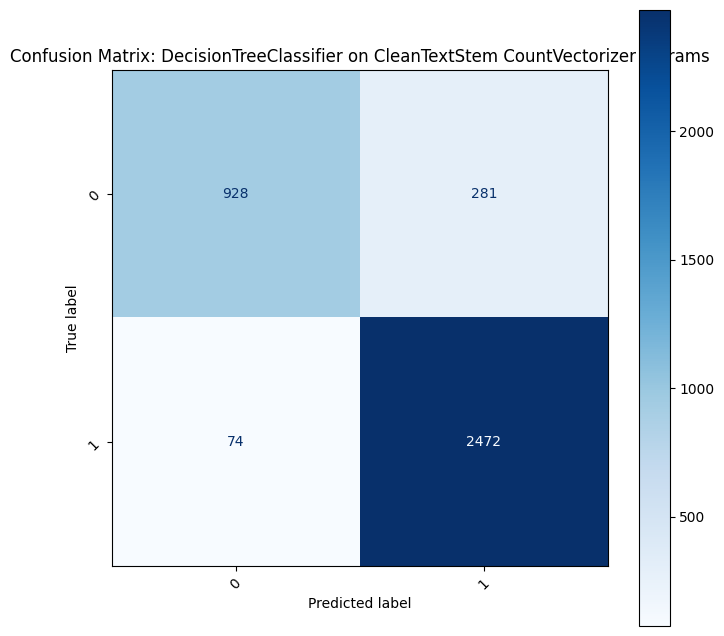

In [392]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming the existence of predefined variables: training_data, testing_data, training_label, testing_label

# We will use placeholder values for clf_name and fs_name since they are referenced in the code but not defined
clf_name = 'DecisionTreeClassifier'
fs_name = 'CleanTextStem CountVectorizer Bigrams'

# Generate the confusion matrix
cm = confusion_matrix(testing_label, pred)

# Create a figure to display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

# Create the Confusion Matrix Display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Use the `plot` method to display the confusion matrix
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Customize the display
ax.set_title(f'Confusion Matrix: {clf_name} on {fs_name}')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

# Show the plot
plt.show()


In [393]:
vectorizer = TfidfVectorizer()
feature_column = "cleanTextLem"
clf = MultinomialNB()
train_features = vectorizer.fit_transform(training_data[feature_column])
test_features = vectorizer.transform(testing_data[feature_column])

# Create a pipeline
pipeline = Pipeline([
    ('classifier', clf)
])

# Fit the classifier
pipeline.fit(train_features, training_label)

# Predict and calculate scores
pred = pipeline.predict(test_features)
accuracy = accuracy_score(testing_label, pred)
f1 = f1_score(testing_label, pred, average='weighted')

# Store results
results.append((clf_name, fs_name, accuracy, f1))

# Print results
print(f"Classifier: {clf_name}, Feature Set: {fs_name}")
print(f"  Accuracy: {accuracy:.3f}")
print(f"  F1 Score: {f1:.3f}\n")

Classifier: DecisionTreeClassifier, Feature Set: CleanTextStem CountVectorizer Bigrams
  Accuracy: 0.894
  F1 Score: 0.890



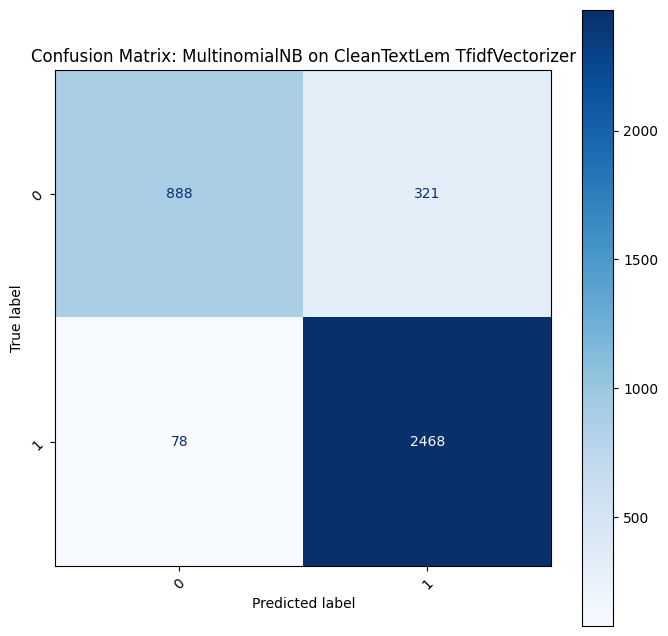

In [395]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming the existence of predefined variables: training_data, testing_data, training_label, testing_label

# We will use placeholder values for clf_name and fs_name since they are referenced in the code but not defined
clf_name = 'MultinomialNB'
fs_name = 'CleanTextLem TfidfVectorizer'

# Generate the confusion matrix
cm = confusion_matrix(testing_label, pred)

# Create a figure to display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

# Create the Confusion Matrix Display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Use the `plot` method to display the confusion matrix
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Customize the display
ax.set_title(f'Confusion Matrix: {clf_name} on {fs_name}')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

# Show the plot
plt.show()


In [396]:
pipelines = {
    'MultinomialNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]),
}

In [397]:
param_grids = {
    'MultinomialNB': {
        'vect__ngram_range': [(1, 1)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [0.01, 0.1, 0.5, 1.0]
    }
}



In [398]:
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=0, refit=True, cv=30)
    grid.fit(training_data['cleanTextLem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextLem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextLem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for MultinomialNB


In [ ]:
pipelines = {
    'DecisionTreeClassifier': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]),
}

In [ ]:
param_grids = {
    'DecisionTreeClassifier': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [0.01, 0.1, 0.5, 1.0]
    }
}



In [ ]:
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=0, refit=True, cv=30)
    grid.fit(training_data['cleanTextLem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextLem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextLem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for MultinomialNB
F1 Score for training data: 98.224
F1 Score for testing data: 51.851
Best Parameters: {'clf__alpha': 0.1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}

Grid Search for SGDClassifier


c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
21870 fits failed out of a total of 65610.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1829 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c

F1 Score for training data: 94.418
F1 Score for testing data: 84.714
Best Parameters: {'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}

Grid Search for LogisticRegression


c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


F1 Score for training data: 97.503
F1 Score for testing data: 84.261
Best Parameters: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}

Grid Search for BernoulliNB
F1 Score for training data: 98.470
F1 Score for testing data: 52.863
Best Parameters: {'clf__alpha': 0.1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 3)}



In [ ]:
pipelines = {
    'MultinomialNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]),
    'SGDClassifier': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', SGDClassifier())
    ]),
    'LogisticRegression': Pipeline([
        ('vect', CountVectorizer()),
        ('clf', LogisticRegression())
    ]),
    'BernoulliNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', BernoulliNB())
    ])
}

In [ ]:
param_grids = {
    'MultinomialNB': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [0.01, 0.1, 0.5, 1.0]
    },
    'SGDClassifier': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [1e-5, 1e-4, 1e-3],
        'clf__max_iter': [500, 1000, 2000],
        'clf__penalty': ['l2', 'l1', 'elasticnet'],
        'clf__loss': ['hinge', 'log', 'modified_huber']
    },
    'LogisticRegression': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__C': [0.01, 0.1, 1.0, 10.0],
        'clf__penalty': ['l2', 'none'],
        'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
    },
    'BernoulliNB': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [0.01, 0.1, 0.5, 1.0]
    }
}



In [ ]:
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=0, refit=True, cv=30)
    grid.fit(training_data['cleanTextLem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextLem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextLem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for MultinomialNB
F1 Score for training data: 98.224
F1 Score for testing data: 51.851
Best Parameters: {'clf__alpha': 0.1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}

Grid Search for SGDClassifier


c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
21870 fits failed out of a total of 65610.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1829 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c

F1 Score for training data: 94.418
F1 Score for testing data: 84.714
Best Parameters: {'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}

Grid Search for LogisticRegression


c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


F1 Score for training data: 97.503
F1 Score for testing data: 84.261
Best Parameters: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}

Grid Search for BernoulliNB
F1 Score for training data: 98.470
F1 Score for testing data: 52.863
Best Parameters: {'clf__alpha': 0.1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 3)}



Grid Search for MultinomialNB
F1 Score for training data: 98.224
F1 Score for testing data: 51.851
Best Parameters: {'clf__alpha': 0.1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}

Grid Search for SGDClassifier
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
21870 fits failed out of a total of 65610.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1829 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'epsilon_insensitive', 'huber', 'log_loss', 'modified_huber', 'squared_epsilon_insensitive', 'squared_error', 'squared_hinge', 'perceptron', 'hinge'}. Got 'log' instead.

--------------------------------------------------------------------------------
1812 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'log_loss', 'squared_epsilon_insensitive', 'modified_huber', 'squared_error', 'hinge', 'huber', 'epsilon_insensitive', 'squared_hinge', 'perceptron'}. Got 'log' instead.

--------------------------------------------------------------------------------
1805 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'huber', 'hinge', 'squared_error', 'epsilon_insensitive', 'squared_epsilon_insensitive', 'perceptron', 'squared_hinge', 'log_loss', 'modified_huber'}. Got 'log' instead.

--------------------------------------------------------------------------------
1829 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'modified_huber', 'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive', 'squared_error', 'perceptron', 'hinge', 'log_loss', 'squared_hinge'}. Got 'log' instead.

--------------------------------------------------------------------------------
1834 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'huber', 'modified_huber', 'squared_epsilon_insensitive', 'perceptron', 'epsilon_insensitive', 'log_loss', 'squared_error', 'squared_hinge', 'hinge'}. Got 'log' instead.

--------------------------------------------------------------------------------
1810 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'log_loss', 'epsilon_insensitive', 'perceptron', 'hinge', 'modified_huber', 'huber', 'squared_error', 'squared_epsilon_insensitive', 'squared_hinge'}. Got 'log' instead.

--------------------------------------------------------------------------------
1832 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'perceptron', 'log_loss', 'huber', 'squared_epsilon_insensitive', 'squared_error', 'hinge', 'squared_hinge', 'epsilon_insensitive', 'modified_huber'}. Got 'log' instead.

--------------------------------------------------------------------------------
1806 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'squared_hinge', 'squared_epsilon_insensitive', 'hinge', 'squared_error', 'huber', 'perceptron', 'epsilon_insensitive', 'log_loss', 'modified_huber'}. Got 'log' instead.

--------------------------------------------------------------------------------
1826 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'huber', 'squared_hinge', 'modified_huber', 'hinge', 'log_loss', 'squared_error', 'perceptron', 'epsilon_insensitive', 'squared_epsilon_insensitive'}. Got 'log' instead.

--------------------------------------------------------------------------------
1843 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'perceptron', 'squared_error', 'epsilon_insensitive', 'log_loss', 'modified_huber', 'hinge', 'squared_epsilon_insensitive', 'huber', 'squared_hinge'}. Got 'log' instead.

--------------------------------------------------------------------------------
1793 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'epsilon_insensitive', 'squared_hinge', 'perceptron', 'log_loss', 'squared_error', 'hinge', 'huber', 'squared_epsilon_insensitive', 'modified_huber'}. Got 'log' instead.

--------------------------------------------------------------------------------
1851 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'squared_epsilon_insensitive', 'squared_error', 'modified_huber', 'hinge', 'log_loss', 'epsilon_insensitive', 'squared_hinge', 'huber', 'perceptron'}. Got 'log' instead.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.86989585 0.86717447 0.86726103 ... 0.86717817 0.86295723 0.86313174]
  warnings.warn(
F1 Score for training data: 94.418
F1 Score for testing data: 84.714
Best Parameters: {'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 1)}

Grid Search for LogisticRegression
c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
F1 Score for training data: 97.503
F1 Score for testing data: 84.261
Best Parameters: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 2)}

Grid Search for BernoulliNB
F1 Score for training data: 98.470
F1 Score for testing data: 52.863
Best Parameters: {'clf__alpha': 0.1, 'vect__max_df': 0.5, 'vect__min_df': 1, 'vect__ngram_range': (1, 3)}

In [ ]:
pipelines = {
    'MultinomialNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]),
    'BernoulliNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', BernoulliNB())
    ])
}

In [ ]:
param_grids = {
    'SGDClassifier': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__alpha': [1e-5, 1e-4, 1e-3],
        'clf__max_iter': [500, 1000, 2000],
        'clf__penalty': ['l2', 'l1', 'elasticnet'],
        'clf__loss': ['hinge', 'log', 'modified_huber']
    },
    'LogisticRegression': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__C': [0.01, 0.1, 1.0, 10.0],
        'clf__penalty': ['l2', 'none'],
        'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
    }
}



In [ ]:
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=0, refit=True, cv=30)
    grid.fit(training_data['cleanTextnoStop'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextnoStop'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextnoStop'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for MultinomialNB
F1 Score for training data: 92.440
F1 Score for testing data: 87.244
Best Parameters: {'clf__alpha': 1, 'vect__ngram_range': (1, 1)}

Grid Search for BernoulliNB
F1 Score for training data: 89.187
F1 Score for testing data: 87.457
Best Parameters: {'clf__alpha': 1.77, 'vect__ngram_range': (1, 1)}



In [ ]:
pipelines = {
    'SGDClassifier': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', SGDClassifier())
    ]),
    'LogisticRegression': Pipeline([
        ('clf', LogisticRegression())
    ]),
}

In [ ]:
param_grids = {
    'SGDClassifier': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5],
        'vect__min_df': [4],
        'clf__alpha': [1e-5,],
        'clf__max_iter': [500],
        'clf__penalty': ['l2'],
        'clf__loss': ['hinge']
    },
    'LogisticRegression': {
        'clf__C': [0.01, 0.1, 1.0, 10.0],
        'clf__penalty': ['l2'],
        'clf__solver': ['saga']
    }
}



In [ ]:
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=0, refit=True, cv=20)
    grid.fit(training_data['cleanTextLem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextLem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextLem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for SGDClassifier
F1 Score for training data: 93.152
F1 Score for testing data: 81.145
Best Parameters: {'clf__alpha': 1e-05, 'clf__loss': 'hinge', 'clf__max_iter': 500, 'clf__penalty': 'l2', 'vect__max_df': 0.5, 'vect__min_df': 4, 'vect__ngram_range': (1, 1)}

Grid Search for LogisticRegression


ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1208, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\pandas\core\series.py", line 953, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'shark coming jerseyshore crazy hurricane sandy'

--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1208, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jimmy\Documents\MLTCoursework\MLTCoursework\.venv\Lib\site-packages\pandas\core\series.py", line 953, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'acuerdan película día después mañana recuerda pasando huracán sandy'


In [ ]:
pipelines = {
    'MultinomialNB': Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ]),
    'DecisionTreeClassifierTfidf': Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
    ]),
    'DecisionTreeClassifierCount': Pipeline([
    ('vect', CountVectorizer()),
    ('clf', DecisionTreeClassifier())
    ])
}

In [ ]:
param_grid = {
    'MultinomialNB': {
        'vect__ngram_range': [(1, 1)],
        'clf__alpha': [1.48],  # Default value
    },
    'DecisionTreeClassifierTfidf': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.5, 0.75, 1.0],
        'vect__min_df': [1, 2, 5],
        'clf__criterion': ['gini'],  # Default value
        'clf__max_depth': [None],  # Default value
        'clf__min_samples_split': [2],  # Default value
        'clf__min_samples_leaf': [1],  # Default value
    },
    'DecisionTreeClassifierCount': {
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'clf__criterion': ['gini'],  # Default value
        'clf__max_depth': [None, 10, 20, 50],
        'clf__min_samples_split': [2],  # Default value
        'clf__min_samples_leaf': [1],  # Default value
    }
}


In [ ]:
for classifier_name, pipeline in pipelines.items():
    print(f"Grid Search for {classifier_name}")

    grid = GridSearchCV(pipeline, param_grids[classifier_name], scoring='f1_micro', n_jobs=-1, verbose=1, refit=True, cv=20)
    grid.fit(training_data['cleanTextStem'], training_data['new_label'])

    print("F1 Score for training data: %0.3f" % (grid.score(training_data['cleanTextStem'], training_data['new_label']) * 100))
    print("F1 Score for testing data: %0.3f" % (grid.score(testing_data['cleanTextStem'], testing_data['new_label']) * 100))
    print("Best Parameters:", grid.best_params_)
    print()

Grid Search for MultinomialNB
Fitting 20 folds for each of 3 candidates, totalling 60 fits
F1 Score for training data: 88.415
F1 Score for testing data: 53.262
Best Parameters: {'clf__alpha': 1.48, 'vect__max_df': 1.0, 'vect__min_df': 5, 'vect__ngram_range': (1, 1)}

Grid Search for DecisionTreeClassifierTfidf
Fitting 20 folds for each of 9 candidates, totalling 180 fits
F1 Score for training data: 97.401
F1 Score for testing data: 62.956
Best Parameters: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'vect__max_df': 1.0, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}

Grid Search for DecisionTreeClassifierCount
Fitting 20 folds for each of 12 candidates, totalling 240 fits
F1 Score for training data: 87.887
F1 Score for testing data: 68.096
Best Parameters: {'clf__criterion': 'gini', 'clf__max_depth': 50, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'vect__ngram_range': (1, 1)}

